In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("retail_data.csv")

In [3]:
df.columns

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [5]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000


In [6]:
df.shape

(169211, 11)

In [7]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [8]:
def preprocess(df):
    #print(df.head())
    
    df.dropna(inplace=True)

    df.drop_duplicates(inplace=True)

    df["Date"] = pd.to_datetime(df["Date"])

    df["Product_Code"] = df["Product_Code"].apply(lambda x : x.split("_")[1])

    df["Warehouse"] = df["Warehouse"].apply(lambda x : x.split("_")[1])

    df["Product_Category"] = df["Product_Category"].apply(lambda x : int(x.split("_")[1]))

    df["Warehouse"] = df["Warehouse"].replace({"A" : 0 , "C":1 , "J": 2 , "S":3})

    df["Product_Code"] =  df["Product_Code"].apply(lambda x : int(x))

    df["StateHoliday"] = df["StateHoliday"].astype("bool")

    df["SchoolHoliday"] = df["SchoolHoliday"].astype("bool")

    df["Open"] = df["Open"].astype("bool")

    df["Promo"] = df["Promo"].astype("bool")
    
    sc = StandardScaler()
    
    df[["Order_Demand","Petrol_price"]] = pd.DataFrame(sc.fit_transform(df[["Order_Demand","Petrol_price"]]))
    
    return df

In [9]:
df = preprocess(df)

In [10]:
df.shape

(169211, 11)

In [11]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,33,3,5,2016-01-03,0.345022,True,False,True,False,0.613817
1,786743,1825,3,6,2016-01-03,1.436064,True,False,True,False,-0.608188
2,786967,551,3,30,2016-01-03,-0.072141,True,False,True,False,-0.608188
3,786856,556,3,30,2016-01-03,-0.136320,True,False,True,False,1.021152
4,899538,1844,0,18,2016-01-03,-0.168185,True,False,True,False,1.428486


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_id        169211 non-null  int64         
 1   Product_Code      169211 non-null  int64         
 2   Warehouse         169211 non-null  int64         
 3   Product_Category  169211 non-null  int64         
 4   Date              169211 non-null  datetime64[ns]
 5   Order_Demand      169211 non-null  float64       
 6   Open              169211 non-null  bool          
 7   Promo             169211 non-null  bool          
 8   StateHoliday      169211 non-null  bool          
 9   SchoolHoliday     169211 non-null  bool          
 10  Petrol_price      169211 non-null  float64       
dtypes: bool(4), datetime64[ns](1), float64(2), int64(4)
memory usage: 11.0 MB


In [13]:
df.drop(columns=["Product_id","Product_Code"],inplace=True)

In [14]:
df.set_index("Date",inplace=True)

In [15]:
df.head()

,Warehouse,Product_Category,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
Date,,,,,,,,
2016-01-03,3,5,0.345022,True,False,True,False,0.613817
2016-01-03,3,6,1.436064,True,False,True,False,-0.608188
2016-01-03,3,30,-0.072141,True,False,True,False,-0.608188
2016-01-03,3,30,-0.136320,True,False,True,False,1.021152
2016-01-03,0,18,-0.168185,True,False,True,False,1.428486


In [16]:
df.corr()

,Warehouse,Product_Category,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
Warehouse,1.000000,-0.097442,0.056568,-0.008844,-0.009598,NaN,-0.009545,0.003752
Product_Category,-0.097442,1.000000,0.057694,0.003627,0.002109,NaN,0.001837,0.000186
Order_Demand,0.056568,0.057694,1.000000,-0.001580,-0.000486,NaN,0.002499,0.002341
Open,-0.008844,0.003627,-0.001580,1.000000,0.281786,NaN,0.016708,0.003046
Promo,-0.009598,0.002109,-0.000486,0.281786,1.000000,NaN,0.009472,0.000752
StateHoliday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,-0.009545,0.001837,0.002499,0.016708,0.009472,NaN,1.000000,0.001646
Petrol_price,0.003752,0.000186,0.002341,0.003046,0.000752,NaN,0.001646,1.000000


In [17]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns="Petrol_price") , df["Petrol_price"] , random_state = 10 , test_size = 0.2)

In [18]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((135368, 7), (33843, 7), (135368,), (33843,))

In [19]:
##Linear regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [22]:
def plot(y_test, y_pred):
    
    print("RMSPE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    
    plt.scatter(y_test, y_pred ,  alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()

RMSPE: 0.9992831007231996


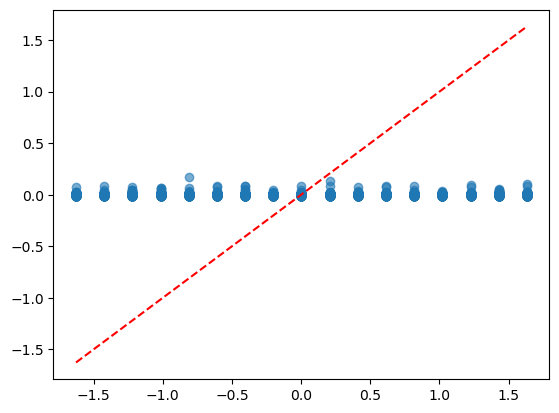

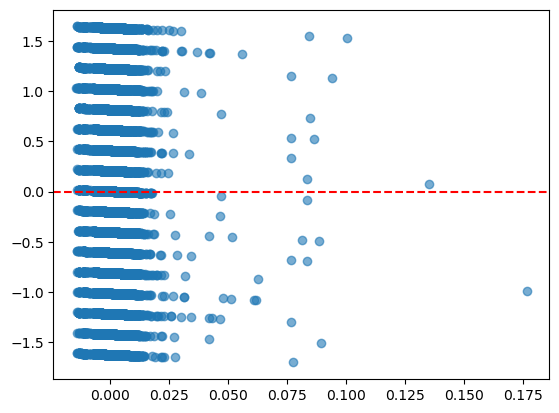

In [23]:
plot(y_test, y_pred)

In [24]:
##Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

RMSPE: 1.0518179472674298


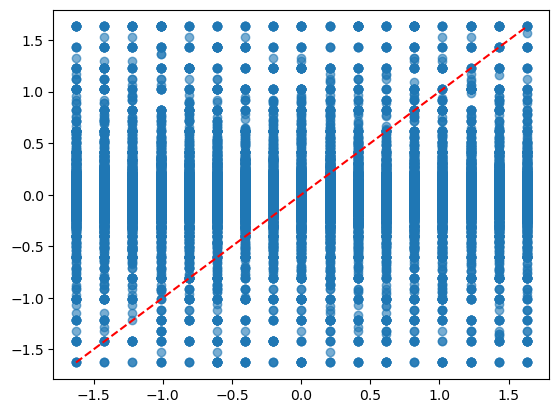

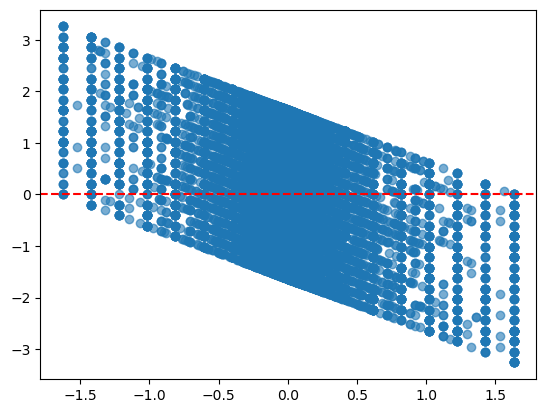

In [27]:
plot(y_test, y_pred)

In [28]:
##Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

RMSPE: 1.0263389448428981


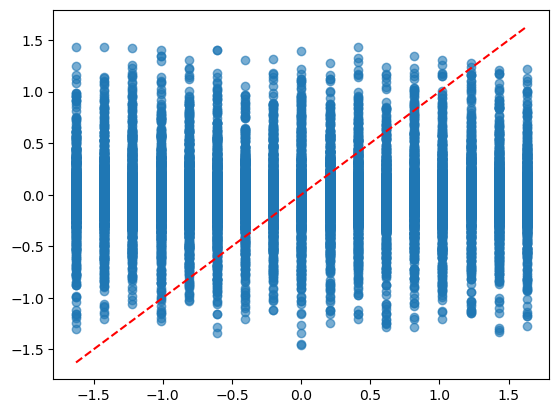

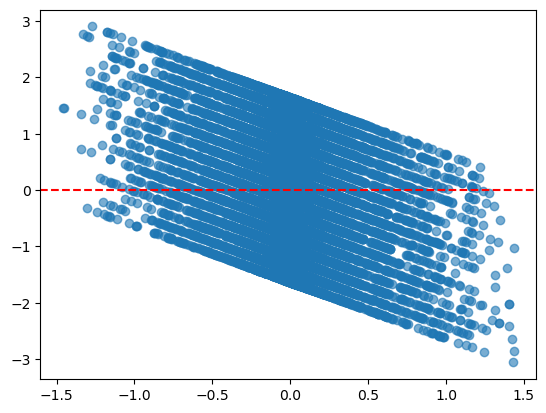

In [31]:
plot(y_test, y_pred)

In [32]:
## XGBRegressor

In [33]:
from xgboost import XGBRegressor

In [34]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

RMSPE: 1.0037785457900916


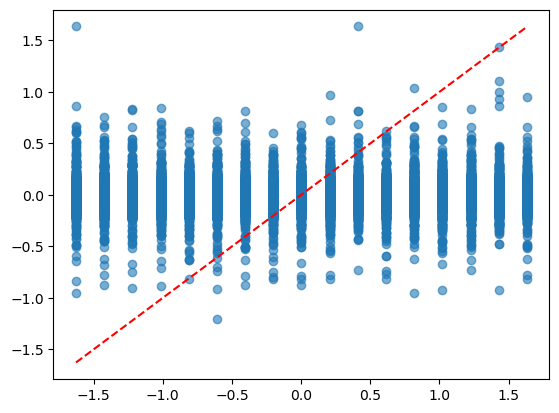

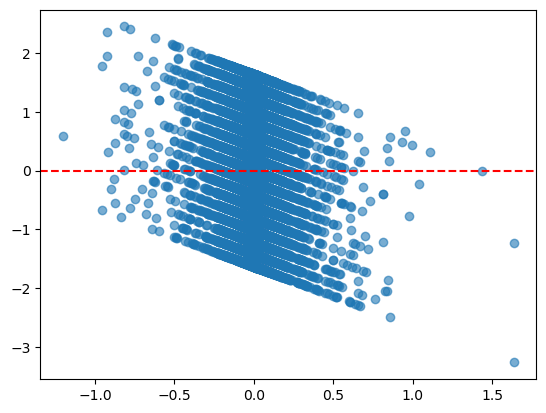

In [35]:
plot(y_test, y_pred)